### Set up Data and Import Libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")

In [21]:
#Define df as our Dataset and set date as our index for the Dataset
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
#Define X and y, with X holding the Features and y the correspoding Count of pedestrians
#Features with PCA k=0.99 (PC1 - PC48)
X = df[df.columns[57:103]]

# The targetvariable we try to predict is the pedestrian count
y = df["pedestrians count"]
X.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,-0.782277,0.526950,-0.340538,-0.406457,-0.503928,-0.226338,-0.344448,-0.576334,-0.085518,0.205616,...,-0.309444,-0.264541,0.126932,-0.395426,0.102615,0.187701,0.582706,-0.249471,-0.132511,0.807536
2018-05-01,-0.903908,0.494358,-0.318205,-0.410745,-0.503336,-0.226371,-0.343911,-0.576521,-0.085714,0.197661,...,0.152003,0.064146,-0.035376,0.067846,0.017834,0.032756,0.020189,-0.321112,-0.109464,0.811342
2018-05-01,-0.905937,0.492642,-0.316608,-0.412681,-0.503470,-0.226307,-0.343910,-0.576369,-0.085637,0.194164,...,0.110450,0.062698,-0.068846,0.046247,0.007846,0.015830,-0.013521,-0.220337,-0.110524,0.816247
2018-05-01,-0.907680,0.489349,-0.313714,-0.410229,-0.503354,-0.226314,-0.343741,-0.576304,-0.085852,0.197084,...,0.043326,0.044238,-0.110446,0.062500,-0.011342,-0.005390,-0.172672,-0.236379,-0.081387,0.823020
2018-05-01,-1.028974,0.459139,-0.293329,-0.419151,-0.502458,-0.225933,-0.343364,-0.576217,-0.085049,0.183775,...,0.055910,0.054291,-0.100188,0.076825,-0.011968,0.005942,-0.172381,-0.295737,-0.071482,0.822965


In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets as numpy arryas (for the Neural Network)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)


from sklearn.preprocessing import StandardScaler
#Normalize the Data
# Scale the inputs to standardize the values of the Features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

### Visualize and exploratory data analysis Data 

In [23]:
df_v = pd.read_csv("data_clean_WITHOUT_dummies.csv") #Load the Dataset without Dummie variables for better visualization
df_v = df_v.drop(labels=range(0,144), axis=0) #Drop the first 144 rows to start with a monday and have better Visualization. The 144 Rows dont matter since we have over 15000
df_v = df_v.set_index('date') #Set the date as the index 

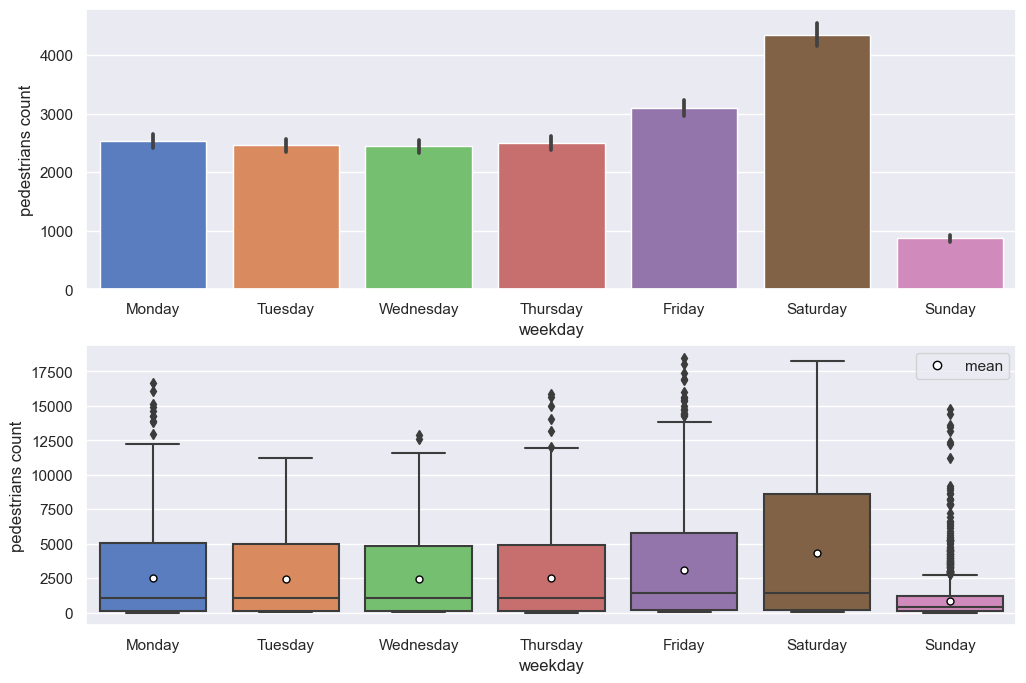

In [24]:
fig, axs = plt.subplots(2, figsize=(12, 8))
sns.barplot(data=df_v, y="pedestrians count", x="weekday", palette="muted", ax=axs[0])
sns.boxplot(data=df_v, y="pedestrians count", x="weekday", palette="muted", ax=axs[1], showmeans=True,  
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])

plt.show()

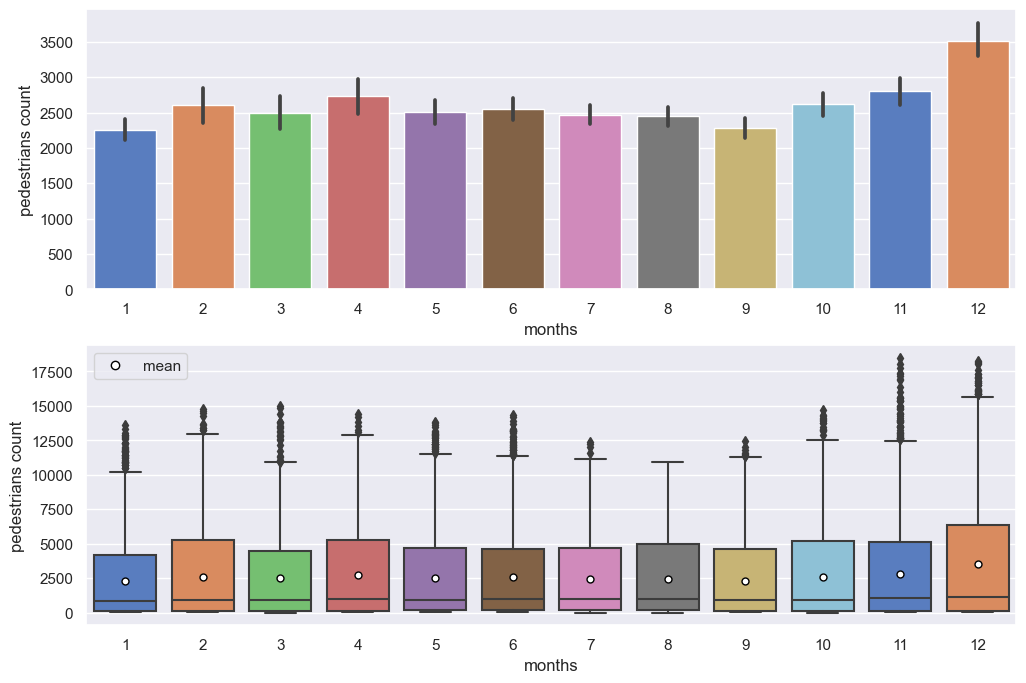

In [25]:
fig, axs = plt.subplots(2, figsize=(12, 8))
sns.barplot(data=df_v, y="pedestrians count", x="months", palette="muted", ax=axs[0])
sns.boxplot(data=df_v, y="pedestrians count", x="months", palette="muted", ax=axs[1], showmeans=True, 
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])

plt.show()

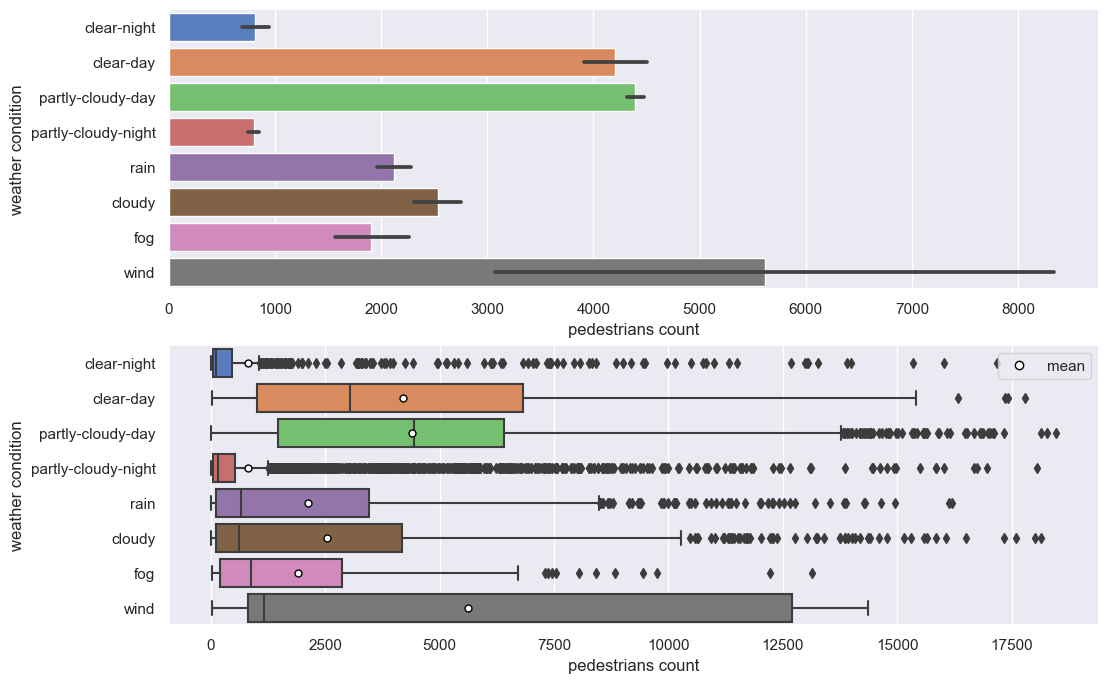

In [26]:
fig, axs = plt.subplots(2, figsize=(12, 8))
sns.barplot(data=df_v, x="pedestrians count", y="weather condition", palette="muted", ax=axs[0]) #Plots Mean
sns.boxplot(data=df_v, x="pedestrians count", y="weather condition", palette="muted", ax=axs[1], showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"}) 

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])    

plt.show()

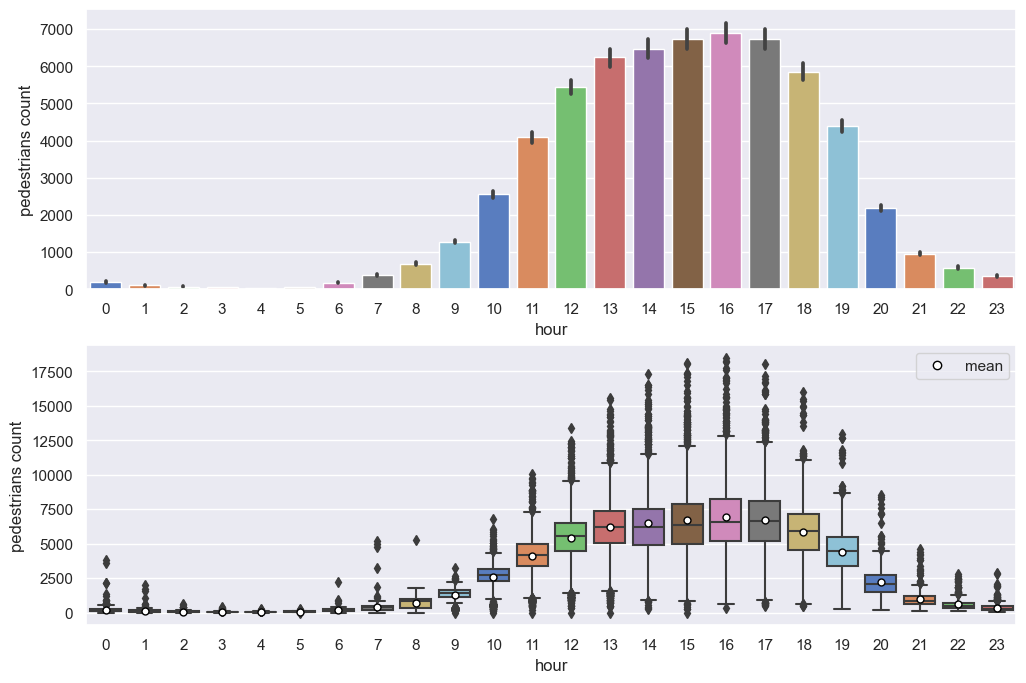

In [27]:
fig, axs = plt.subplots(2, figsize=(12, 8))
sns.barplot(data=df_v, x="hour", y="pedestrians count", palette="muted", ax=axs[0])#Plots Mean
sns.boxplot(data=df_v, x="hour", y="pedestrians count", palette="muted", ax=axs[1], showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])   

plt.show()

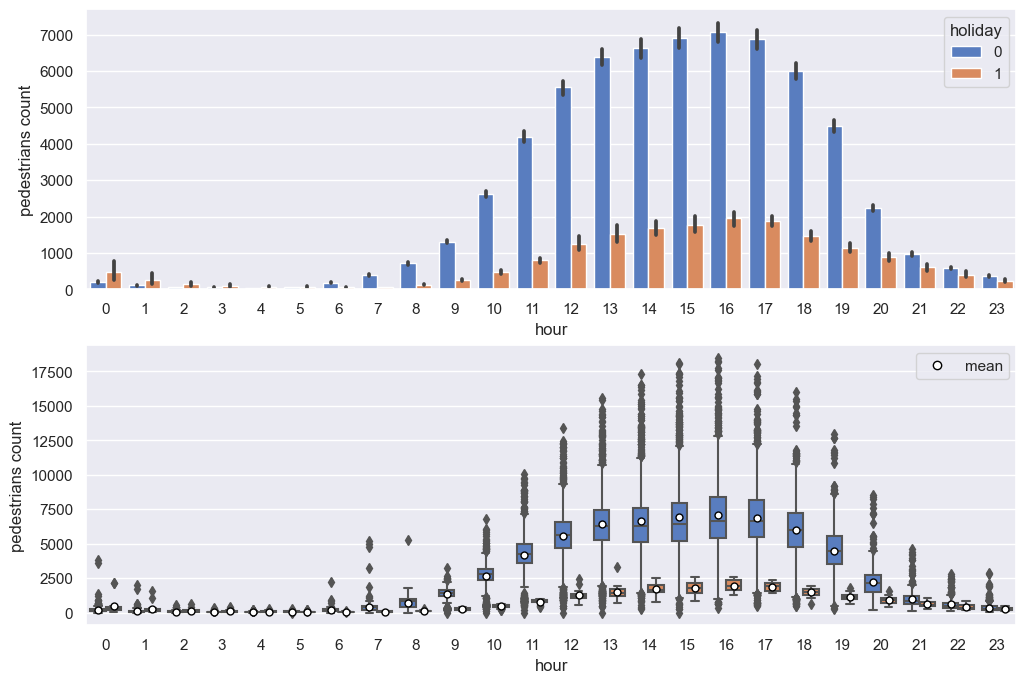

In [28]:
fig, axs = plt.subplots(2, figsize=(12,8))


sns.barplot(data=df_v, x="hour", y="pedestrians count", palette="muted", hue="holiday", ax=axs[0])
sns.boxplot(data=df_v, x="hour", y="pedestrians count", palette="muted", hue="holiday", ax=axs[1], showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])

plt.show()

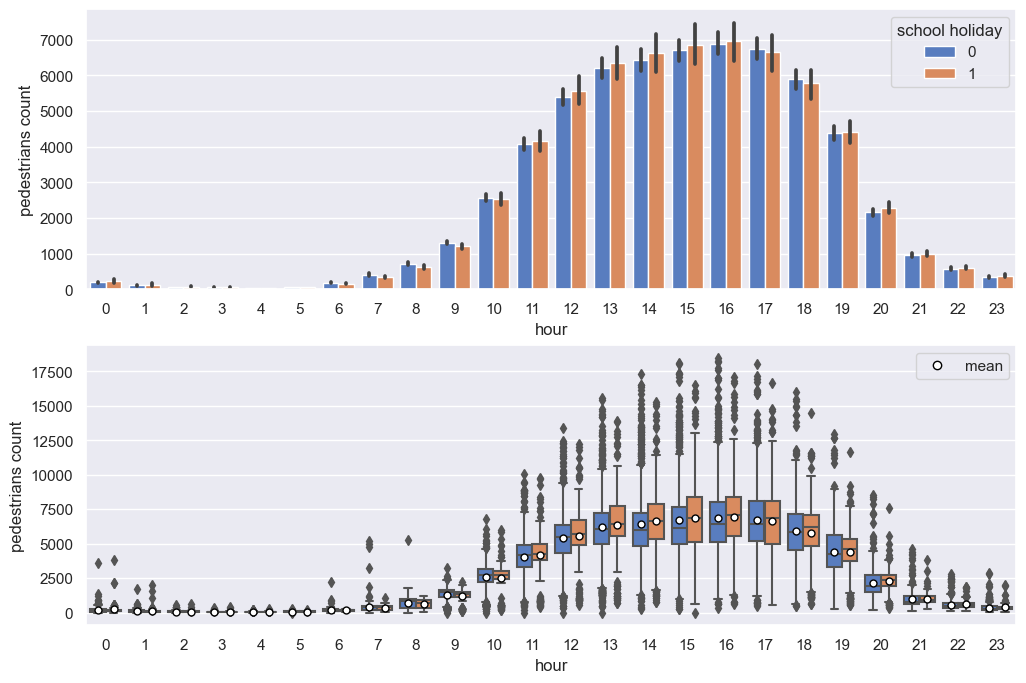

In [29]:
fig, axs = plt.subplots(2, figsize=(12,8))


sns.barplot(data=df_v, x="hour", y="pedestrians count", palette="muted", hue="school holiday", ax=axs[0])
sns.boxplot(data=df_v, x="hour", y="pedestrians count", palette="muted", hue="school holiday", ax=axs[1], showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

axs[1].legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])

plt.show()

### Define Functions for easier use

In [30]:
def Xtest_smaller(Xtest, ytest, percent=0.5, min_ped=0):
    """
    Give a certain percent or minimum pedestrian condition on the entries in the Test dataset (or the train dataset) 
    to create a smaller Test dataset to do further exploratorive data analysis.

    percent: Percent of the original Dataset you want to keep on a scale between 0 and 1
    min_pred: Minimum number of pedestrians and the corresponding feautes the smaller dataset should keep

    Check to validate it works:
    1:
    Xtest_small, ytest_small = Xtest_smaller(Xtest, ytest, percent=1, min_ped=0)
    np.array_equal(ytest, ytest_small) --> True

    2:
    Xtest_small, ytest_small = Xtest_smaller(Xtest, ytest, percent=0.5, min_ped=0)
    ytest.shape[0] == ytest_small.shape[0] * 2 --> True

    3:
    Xtest_small, ytest_small = Xtest_smaller(Xtest, ytest, percent=1, min_ped=400)
    ytest_small.min() --> 400
    """

    dfXtest = pd.DataFrame(Xtest) #Create a dataframe
    dfytest = pd.DataFrame(ytest) #Create a dataframe 
    
    dfytest.index = range(dfytest.shape[0]) #set the index of the ytest dataframe to numbers from 0 to len of the dataframe 

    new_df = pd.concat([dfytest, dfXtest], axis=1) #Concat the two dataframes to create a new combined one

    if min_ped > 0: #Check if you want to restrict to a minimum number of pedestrians
        if percent == 1: #Check if you want a 100% of the entries with the minimum number of pedestrians 
            new_df_small = new_df.loc[new_df["pedestrians count"] >= min_ped]

            ytest_small = new_df_small["pedestrians count"]
            Xtest_small = new_df_small[new_df_small.columns[1:49]]
        if percent != 1: #Check if you don't want a 100% of the entries
            new_df_small = new_df.loc[new_df["pedestrians count"] >= min_ped]

            df_ytest_small = new_df_small["pedestrians count"]
            df_Xtest_small = new_df_small[new_df_small.columns[1:49]]

            #Split the dataset into two parts with the test_size determined by the percent of entries you want to keep
            Xtrain_small, Xtest_small, ytrain_small, ytest_small  = train_test_split( 
                df_Xtest_small, df_ytest_small, test_size=percent, random_state=72)
    else: #If you only want to split the original dataset into a smaller one on a percentage basis (without a minimum number of pedestrians)
        df_ytest_small = new_df["pedestrians count"]
        df_Xtest_small = new_df[new_df.columns[1:49]]
        
        #Split the dataset into two parts with the test_size determined by the percent of entries you want to keep
        Xtrain_small, Xtest_small, ytrain_small, ytest_small  = train_test_split(
            df_Xtest_small, df_ytest_small, test_size=percent, random_state=72)
    
    if percent == 1 and min_ped==0: #If you dont want a smaller dataset (idk, reduce possible mistakes)
       Xtest_small = dfXtest #So to_numpy() works in the return statement
       ytest_small = ytest


    return Xtest_small.to_numpy(), ytest_small #Turn dataframe to numpy array in order to perfom mathematical operations


In [31]:

from tensorflow import keras
#Function two quickly define two callbacks with certain parameters
def def_callbacks(stope_p = 10, reducelr_p=5, reducelr_lr=0.00001): #Use standard values when now argument is give n
    """
    stop_early patience = 10
    reduce_lr patience =5, reducelr learning rate=0.00001)
    """
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=stope_p) #Stop early stops the model fit once the Mean average error on the validation data doesn't improve after a certain amout of epochs 
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.2, #Reduce the learning rate, by a factor of 0.2, when the Mean average error doesn't improve after a certain amout of epochs 
                              patience=reducelr_p, min_lr=reducelr_lr)
    callbacks_list = [stop_early,reduce_lr]
    return callbacks_list
    

### Baseline Model with Tensorflow

In [32]:
from tensorflow.keras import layers
from tensorflow import keras

In [33]:
#Define Baseline Neural Network model

#Create a Keras Sequential class to hold the different layers of our Neural Network
model = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 100 neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 50 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 50 neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 50 neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 25 neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 10 neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 10 neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a output layer with 1 Neuron because we only have one output --> predicted pedestrian count

model.summary()#Display an overview of the model 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4700      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 25)                1275      
                                                                 
 dense_13 (Dense)            (None, 10)                260       
                                                                 
 dense_14 (Dense)            (None, 10)               

In [34]:

#Specify the training configuration for the Neural Network
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer that minimizes our loss function (f.e SGD or Adam) with a learning rate of 0.001
    loss=keras.losses.mae,  # Loss function the Optimizer minimizes --> Mean absolute error 
    metrics=["mae"], # List of metrics to monitor
)


#Fit the model an the training data and use a validation split for ###???Cross validation????#####
history = model.fit(
    Xtrain, # Fit the model on the train data 
    ytrain, #The target variable used to calculate the mean absolut error between the target variable and the predictions of the model 
    #batch_size=64, #Dataset will be divided into batches with 64 samples and will be updated after each batch size accordingly
    epochs=250, # 1 epoch is one training iteration - for each epoch the Neural Network processes the entire training data and updates the weights 
    callbacks = def_callbacks(25), #Stop training when training is no longer improving Mean absolute error of the validation data (20% of the training data) within 20 epochs(--> def_callbacks Function)
    validation_split=0.2, #Reserve 20% of the training data for validation at the end of each epoch, to prevent overfitting
)

Epoch 1/250


2022-12-01 15:35:38.435947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1559.5410 - mae: 1559.5410

2022-12-01 15:35:41.526684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 4s 12ms/step - loss: 1559.5410 - mae: 1559.5410 - val_loss: 720.1311 - val_mae: 720.1311 - lr: 0.0010
Epoch 2/250
269/269 [==============================] - 3s 11ms/step - loss: 632.7390 - mae: 632.7390 - val_loss: 496.6890 - val_mae: 496.6890 - lr: 0.0010
Epoch 3/250
269/269 [==============================] - 3s 11ms/step - loss: 477.8206 - mae: 477.8206 - val_loss: 436.3174 - val_mae: 436.3174 - lr: 0.0010
Epoch 4/250
269/269 [==============================] - 3s 11ms/step - loss: 422.2934 - mae: 422.2934 - val_loss: 410.2291 - val_mae: 410.2291 - lr: 0.0010
Epoch 5/250
269/269 [==============================] - 3s 12ms/step - loss: 397.0230 - mae: 397.0230 - val_loss: 404.0351 - val_mae: 404.0351 - lr: 0.0010
Epoch 6/250
269/269 [==============================] - 3s 11ms/step - loss: 375.5960 - mae: 375.5960 - val_loss: 400.1772 - val_mae: 400.1772 - lr: 0.0010
Epoch 7/250
269/269 [==============================] - 3s 11ms/step - loss: 369.

### Model evaluation

In [35]:
# Evaluate the model on the test data using `evaluate` result is the corresponding loss functin (MAE), MAE and MSE (Metrics defined the model configuration)
print("Evaluation on the Test data")
results = model.evaluate(Xtest, ytest)
results_train = model.evaluate(Xtrain, ytrain)
print("Test data loss(MAE), Test data MAE, Test data MSE:", results)
print("Train data loss(MAE), Train data MAE, Train data MSE:", results_train)

Evaluation on the Test data
336/336 [==============================] - 2s 5ms/step - loss: 269.8394 - mae: 269.8394
Test data loss(MAE), Test data MAE, Test data MSE: [314.9180603027344, 314.9180603027344]
Train data loss(MAE), Train data MAE, Train data MSE: [269.8394470214844, 269.8394470214844]


In [36]:
#Create a function that evaluates the model and saves the results in a dataframe for comparisson with the Hypertuned models
def evaluate_model(model, Xtest, ytest): #Evaluate the Model on the Test data
    eval_dict = model.evaluate(Xtest, ytest, return_dict=True) #Create a dictionary to stoe the results 
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())]) #Create a dataframe out of the dictionary 
    
    return display_df

# Evaluate basemodel on Test Data with the above created function
results_comparisson = evaluate_model(model, Xtest, ytest) 

#Set the index as 'Basemodel
results_comparisson.index = ["Basemodel on test data"]

# Display results
results_comparisson.head()

144/144 [==============================] - 1s 6ms/step - loss: 314.9181 - mae: 314.9181


,loss,mae
Basemodel on test data,314.91806,314.91806


### Visualize the Model performance

 26/144 [====>.........................] - ETA: 0s

2022-12-01 15:39:46.401624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 3ms/step


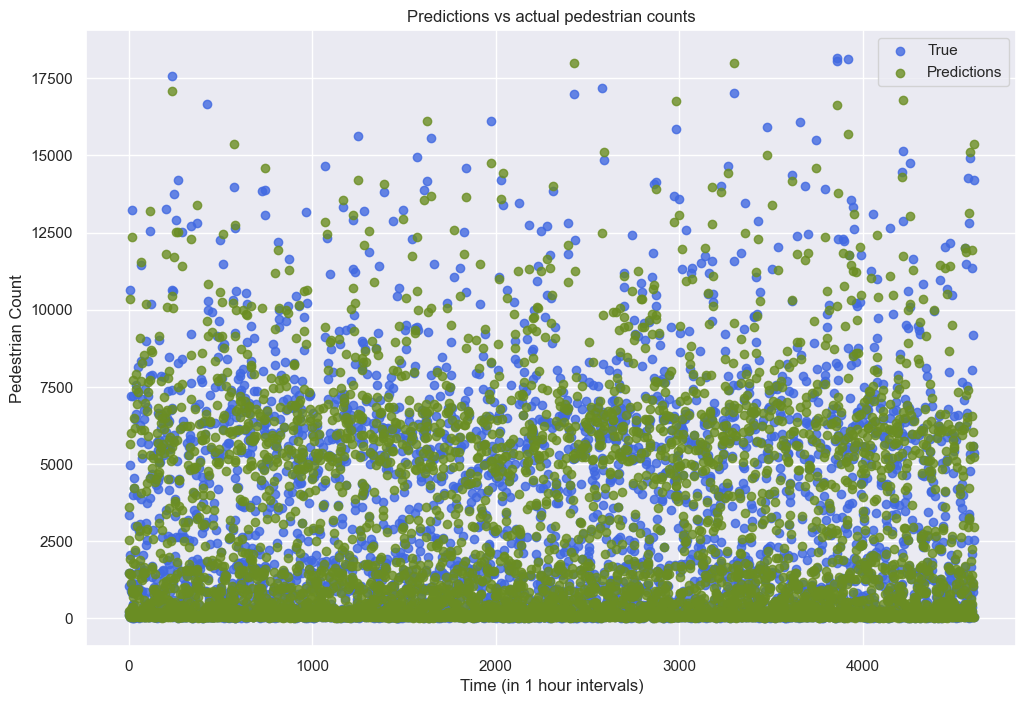

In [37]:
#Visualize the results predictions vs actual pedestrian counts
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual pedestrian count
ypred = model.predict(Xtest)


fig, axs = plt.subplots(figsize=(12, 8))

axs.scatter(xs, ytest, color ='royalblue', alpha=0.8, label="True") #Plot the actual pedestrian count 
axs.scatter(xs, ypred, color ='olivedrab', alpha=0.8, label="Predictions") #Plot the predicted pedestrian count 
axs.set_title('Predictions vs actual pedestrian counts')
axs.set_ylabel('Pedestrian Count')
axs.set_xlabel('Time (in 1 hour intervals)')
axs.legend(loc='upper right')

144/144 [==============================] - 1s 6ms/step - loss: 314.9181 - mae: 314.9181


Text(109.87499999999999, 0.5, 'MAE')

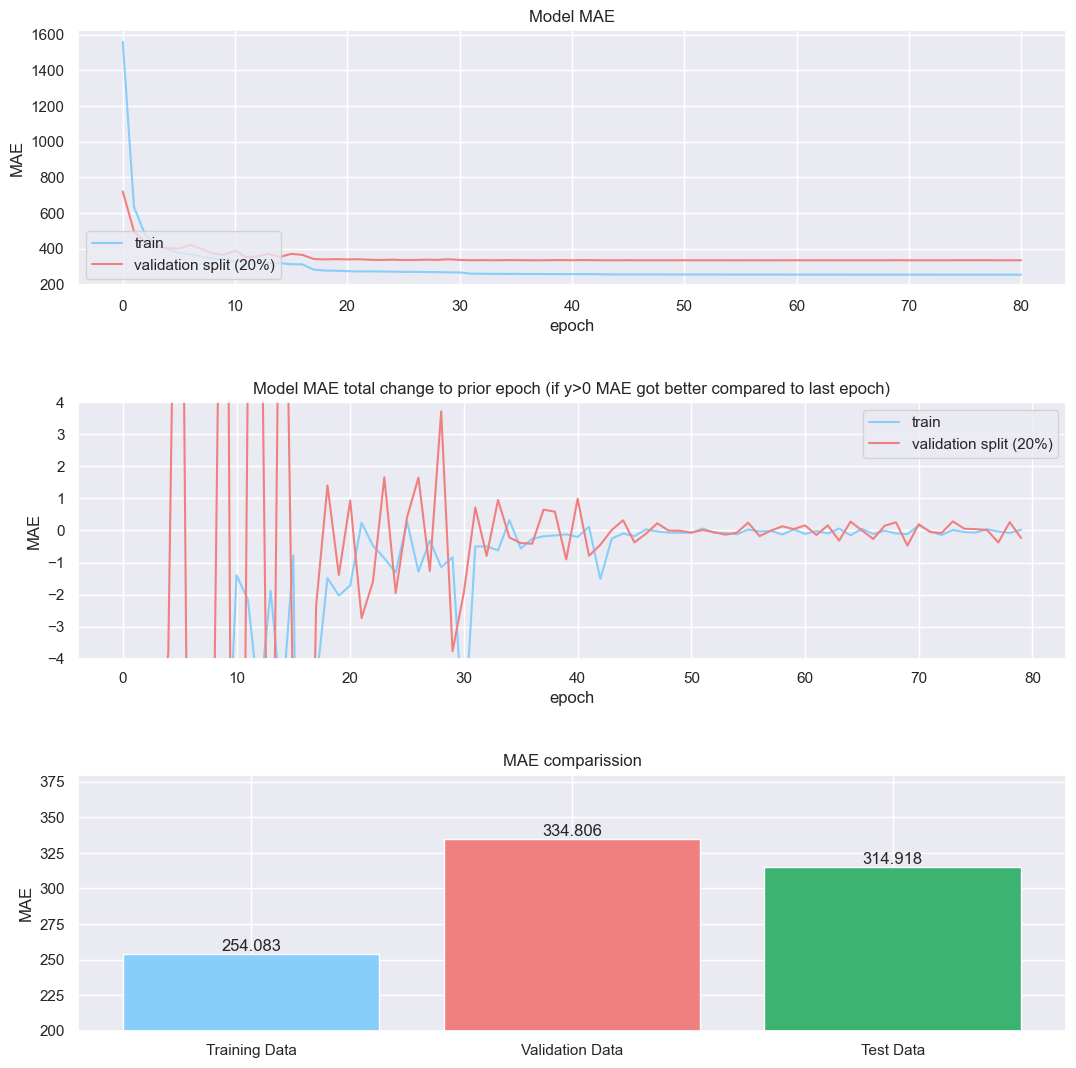

In [38]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(3, figsize=(12, 12))

fig.tight_layout(pad=5.0)

axs[0].plot(history.history['mae'], label="train", color="lightskyblue")
axs[0].plot(history.history['val_mae'], label="validation split (20%)", color="lightcoral")
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='lower left')


len_epoch = len(history.history["mae"]) #How many total epochs
#Compare the MAE of the Test Data with the one in the prior epoch and take the difference to see if it got better 
dif_train = [history.history["mae"][1+l] - history.history["mae"][0+l] for l in range(len_epoch-1)] 
#Compare the MAE of the Validation Data with the one in the prior epoch and take the difference to see if it got better 
dif_val = [history.history["val_mae"][1+l] - history.history["val_mae"][0+l] for l in range(len_epoch-1)] 

axs[1].plot(dif_train, label="train", color="lightskyblue")
axs[1].plot(dif_val, label="validation split (20%)", color="lightcoral")
axs[1].set_title('Model MAE total change to prior epoch (if y>0 MAE got better compared to last epoch)')
axs[1].set_ylabel('MAE')
axs[1].set_xlabel('epoch')
axs[1].legend(loc='upper right')
axs[1].set_ylim([-4, 4])

f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

axs[2].bar("Training Data",min(f_mae), color="lightskyblue") #Display minimum mae of the training data set
axs[2].bar("Validation Data", min(f_val_mae), color="lightcoral")#Display minimum mae of the validation data set
axs[2].bar("Test Data", f_test_mae[0], color="mediumseagreen")#Display mae of the test data set
axs[2].bar_label(axs[2].containers[0], label_type='edge')
axs[2].bar_label(axs[2].containers[1], label_type='edge')
axs[2].bar_label(axs[2].containers[2], label_type='edge')
axs[2].set_ylim([200, 380])
axs[2].set_title('MAE comparission')
axs[2].set_ylabel('MAE')


### Hyperparamter tuning 

In [39]:
import keras_tuner as kt

#### Tuning Optimzer, learning rate and activation function (Hyperparameter)
##### This approach is used to reduce the computing time. A better way would be to build a larger model where the tuner would tune the optimizer, learning rate, activation function, number of layers and number on nodes etc. at the same time

In [40]:
#Find the best Optimizer, activation fucntion and learning rate for the baseline model 
def h1_model_builder(hp): 
 
#Create a Keras Sequential class to hold the different layers of our Neural Network
    model = keras.Sequential()

    #Tune activation function
    hp_activation = hp.Choice('activation', values=['relu', 'tanh']) #Define a Hyperparameter as a choiche (option) for different activation functions. The tuner will try these to find the best possible for the baseline model 

    model.add(keras.layers.Flatten()) #Add a Input layer and use flatten to get a 1 dimensional input!!!!
    model.add(layers.Dense(100, activation=hp_activation)) #Add a Hidden layer with 100 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
    model.add(layers.Dense(50, activation=hp_activation)) #Add a second Hidden layer with 50 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
    model.add(layers.Dense(50, activation=hp_activation)) #Add a third Hidden layer with 50 Neurones with Dense. 
    model.add(layers.Dense(50, activation=hp_activation)) #Add a third Hidden layer with 50 Neurones with Dense. 
    model.add(layers.Dense(25, activation=hp_activation)) #Add a fourth Hidden layer with 25 Neurones with Dense. 
    model.add(layers.Dense(10, activation=hp_activation)) #Add a fourth Hidden layer with 10 Neurones with Dense. 
    model.add(layers.Dense(10, activation=hp_activation)) #Add a fourth Hidden layer with 10 Neurones with Dense. 
    model.add(layers.Dense(1, activation=hp_activation))  #Add an output layer with activation function relu  

    #Tune learning rate 
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4, 1e-5])  # Define a Hyperparameter as a choice to tune learning rate with the values 0.01, 0.001, 0.0001, 0.00001

    #Create a dictionary to hold the different optimization functions 
    optimizers_dict = {
        "Adam":    keras.optimizers.Adam(learning_rate=hp_learning_rate),
        "SGD":     keras.optimizers.SGD(learning_rate=hp_learning_rate),
        "Adagrad": keras.optimizers.Adagrad(learning_rate=hp_learning_rate),
        "Adadelta": keras.optimizers.Adadelta(learning_rate=hp_learning_rate),
        "RMSprop": keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
        }

    hp_optimizers = hp.Choice( #Define a Hyperparameter as a choice to tune the optimizer 
        'optimizer', values=["Adam", "SGD", "Adagrad", "Adadelta", "RMSprop"] #Options the tuner will try, that correspond to the optimizer dictionary keys 
        )


    model.compile(optimizer=optimizers_dict[hp_optimizers], #Complie the model and use the optimizer choice as input for the optimizer 
                  loss=keras.losses.mae, #Loss function is Mean average error 
                  metrics=["mae"])
    
    return model

In [41]:
#Easy tuner because we only have 5 different Optimizer options, 4 learning rate optimizations and 2 activation functions, 
# so randomly selecting is okay because no matter what we will try every combination of the 40
h1_tuner = kt.RandomSearch(hypermodel = h1_model_builder, #The model the Randomsearch tuner will tune 
                       objective = 'val_mae', #Objetive the tuner will try to minimize 
                       max_trials =45 , #The total number of trails to test at most (to try every combination it has to be at least 40 (5*4*2))
                       directory = 'kt_dir', #create a dictionary to store the tries and metrics 
                       overwrite=True, #To be able to overwrite prior tuner entries
                       project_name = 'kt_RandomSearch')

In [42]:
#Initiate the tuner with the Train data
#Tune for 10 epochs with a validation split of 20% and a possible minimum learning rate of 0.000001 for 
# the Reduce learning rate callback function
h1_tuner.search(Xtrain, ytrain, epochs=15, validation_split=0.2, callbacks=def_callbacks(reducelr_lr=0.00001)) 

Trial 27 Complete [00h 00m 38s]
val_mae: 2604.60205078125

Best val_mae So Far: 359.4833984375
Total elapsed time: 01h 50m 07s
INFO:tensorflow:Oracle triggered exit


In [43]:
#Create a new Model with the Hyperparameters found by the tuner
h1_best_hps = h1_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The first hyperparameter search is complete. The best optimizer is {h1_best_hps.get('optimizer')}, the best activation function is 
{h1_best_hps.get("activation")} and the optimal learning rate for the optimizer is {h1_best_hps.get('learning_rate')}.
Summary:
""")

#Display the best 10 Hypermodel configurations found by the tuner
h1_tuner.results_summary() 

#Hypertuned Model 
h1_model = h1_tuner.hypermodel.build(h1_best_hps)
#Create a new History for the model to compare it with the Baseline Histroy 
h1_history = h1_model.fit(Xtrain, ytrain, epochs=150, validation_split=0.2,
                    callbacks=def_callbacks(reducelr_lr=0.000001))


The first hyperparameter search is complete. The best optimizer is Adam, the best activation function is 
relu and the optimal learning rate for the optimizer is 0.001.
Summary:

Results summary
Results in kt_dir/kt_RandomSearch
Showing 10 best trials
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
optimizer: Adam
Score: 359.4833984375
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.01
optimizer: RMSprop
Score: 373.9670715332031
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.01
optimizer: Adagrad
Score: 388.2423400878906
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.0001
optimizer: SGD
Score: 401.4097900390625
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.01
optimizer: Adadelta
Score: 414.20513916015625
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.0001
optimizer: Adam
Score: 653.2410278320312
Trial summary
Hyperparameters:
activation: relu
learning_rate: 1e-05
optimizer: A

2022-12-01 17:30:03.072170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1628.6508 - mae: 1628.6508

2022-12-01 17:30:08.136283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 6s 18ms/step - loss: 1628.6508 - mae: 1628.6508 - val_loss: 747.7581 - val_mae: 747.7581 - lr: 0.0010
Epoch 2/150
269/269 [==============================] - 3s 11ms/step - loss: 682.8969 - mae: 682.8969 - val_loss: 559.5453 - val_mae: 559.5453 - lr: 0.0010
Epoch 3/150
269/269 [==============================] - 927s 3s/step - loss: 533.5844 - mae: 533.5844 - val_loss: 466.8224 - val_mae: 466.8224 - lr: 0.0010
Epoch 4/150
269/269 [==============================] - 3s 11ms/step - loss: 461.2625 - mae: 461.2625 - val_loss: 429.1642 - val_mae: 429.1642 - lr: 0.0010
Epoch 5/150
269/269 [==============================] - 3s 10ms/step - loss: 420.9167 - mae: 420.9167 - val_loss: 432.0168 - val_mae: 432.0168 - lr: 0.0010
Epoch 6/150
269/269 [==============================] - 3s 10ms/step - loss: 401.0274 - mae: 401.0274 - val_loss: 405.5616 - val_mae: 405.5616 - lr: 0.0010
Epoch 7/150
269/269 [==============================] - 3s 10ms/step - loss: 385.

In [44]:
# Evaluate model on test set using the above created function to save the results in the results_comparisson dataframe
hyper_results1 = evaluate_model(h1_model, Xtest, ytest) 

# Set index to Baseline model Op/lr/af
hyper_results1.index = ["First Hypertuned model on test data"]

# Append results in dataframe
results_comparisson = pd.concat([results_comparisson, hyper_results1])

results_comparisson.head()


144/144 [==============================] - 1s 6ms/step - loss: 319.0258 - mae: 319.0258


,loss,mae
Basemodel on test data,314.918060,314.918060
First Hypertuned model on test data,319.025787,319.025787


#### Optimal number of layers and nodes
#### Find the optimal number of layers and nodes and if Dropout is benefitial or not.

In [45]:
def h2_model_builder(hp): 
 
    #Create a Keras Sequential class to hold the different layers of our Neural Network
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
# Tune the number of hidden layers and units (Nodes)
    # Number of hidden layers: 8 - 12
    for i in range(hp.Int("num_layers", 6, 8)):
        
        # Number of Nodes: 32 - 512 with stepsize of 32
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=128, step=32), #Define a Hyperparameter as a integer between 32 and 128 as different amount of Nodes 
                activation="relu") #Using the best activation function found by the tuner above for the baseline model (Giving a choice and tuning it again would be likely better but much more time consuing to compute)
            )
        
    if hp.Boolean("dropout"): #Define a Hyperparameter as a Boolean value to either use or not use Dropout
        #Will randomly "droput" (deactivate) different weights (25% of total) and train the model on the remaining. After the tuning is done all weights will be keept (so no weights are actualy not used by the final mdoel)
        model.add(layers.Dropout(rate=0.25)) 
    
    
    # Add output layer
    model.add(keras.layers.Dense(units=1, activation="relu"))
    
    #Here setting a learning rate (best by above tuner on baseline model) is better/more efficient because other wise the Tuner would also have to tune the learning rate adding a huge amout of new models to try 
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss=keras.losses.mae,
                  metrics=["mae"])
    
    return model

In [46]:
# Using the Hyperband tuner which selects different Hyperparameter combinations when the have promising results after a few epochs and tunes them further
h2_tuner = kt.Hyperband(hypermodel=h2_model_builder, #Select the model that should be tuned
                     objective='val_mae', #Objective to minimize, in this case the validation split Mean average error
                     max_epochs=25, #Maximum number of epochs to train 1 model configuration 
                     hyperband_iterations=2, #the number of times to iterate over the full Hyperband algorithm
                     overwrite=True, ##To be able to overwrite prior tuner entries
                     directory='kt_dir',
                     project_name='kt_Hyperband')


In [47]:
# Execute the tuner  
h2_tuner.search(Xtrain, ytrain, epochs=25, validation_split=0.2, callbacks=def_callbacks(reducelr_lr=0.000001, reducelr_p=3))

Trial 60 Complete [00h 01m 26s]
val_mae: 324.5933837890625

Best val_mae So Far: 322.8858642578125
Total elapsed time: 01h 30m 45s
INFO:tensorflow:Oracle triggered exit


In [48]:
#Use the best Hyperparameter to build a new model and train the model on the training Dataset

#Create a new Model with the Hyperparameters found by the tuner
h2_best_hps = h2_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The second hyperparameter search is complete. The optimal number of layers is {h2_best_hps.get('num_layers')}.
Summary:
""")

#Display the best 10 Hypermodel configurations found by the tuner
h2_tuner.results_summary()

#Hypertuned Model 
h2_model = h2_tuner.hypermodel.build(h2_best_hps)
#Create a new History for the model to compare it with the other models
h2_history = h2_model.fit(Xtrain, ytrain, epochs=150, validation_split=0.2,
                    callbacks=def_callbacks(reducelr_lr=0.000001))


The second hyperparameter search is complete. The optimal number of layers is 8.
Summary:

Results summary
Results in kt_dir/kt_Hyperband
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 128
units_1: 96
units_2: 64
units_3: 32
units_4: 128
units_5: 96
dropout: False
units_6: 32
units_7: 64
tuner/epochs: 25
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 322.8858642578125
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 128
units_2: 64
units_3: 32
units_4: 96
units_5: 128
dropout: False
units_6: 32
units_7: 128
tuner/epochs: 25
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 323.1303405761719
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 32
units_2: 64
units_3: 96
units_4: 96
units_5: 96
dropout: False
units_6: 96
units_7: 32
tuner/epochs: 25
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 324.5933837890625
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 64
units

2022-12-01 19:56:11.414928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 931.4247 - mae: 931.4247

2022-12-01 19:56:15.697516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 6s 17ms/step - loss: 931.4247 - mae: 931.4247 - val_loss: 804.9304 - val_mae: 804.9304 - lr: 0.0100
Epoch 2/150
269/269 [==============================] - 3s 12ms/step - loss: 541.8194 - mae: 541.8194 - val_loss: 435.2888 - val_mae: 435.2888 - lr: 0.0100
Epoch 3/150
269/269 [==============================] - 4s 13ms/step - loss: 482.1736 - mae: 482.1736 - val_loss: 554.5203 - val_mae: 554.5203 - lr: 0.0100
Epoch 4/150
269/269 [==============================] - 4s 14ms/step - loss: 441.7768 - mae: 441.7768 - val_loss: 393.6024 - val_mae: 393.6024 - lr: 0.0100
Epoch 5/150
269/269 [==============================] - 3s 13ms/step - loss: 460.0230 - mae: 460.0230 - val_loss: 481.3663 - val_mae: 481.3663 - lr: 0.0100
Epoch 6/150
269/269 [==============================] - 3s 13ms/step - loss: 416.3403 - mae: 416.3403 - val_loss: 424.2952 - val_mae: 424.2952 - lr: 0.0100
Epoch 7/150
269/269 [==============================] - 4s 13ms/step - loss: 428.80

In [49]:
# Evaluate model on test set using the above created function to save the results in the results_comparisson dataframe
hyper_results2 = evaluate_model(h2_model, Xtest, ytest)

# Set index to hypertuned
hyper_results2.index = ["Second Hypertuned model on test data"]

# Append results in dataframe
results_comparisson = pd.concat([results_comparisson, hyper_results2])

results_comparisson.head()

144/144 [==============================] - 1s 6ms/step - loss: 297.1066 - mae: 297.1066


,loss,mae
Basemodel on test data,314.918060,314.918060
First Hypertuned model on test data,319.025787,319.025787
Second Hypertuned model on test data,297.106598,297.106598


### Viusalize the Hypertuned Model 

2022-12-01 19:58:37.350801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 4ms/step


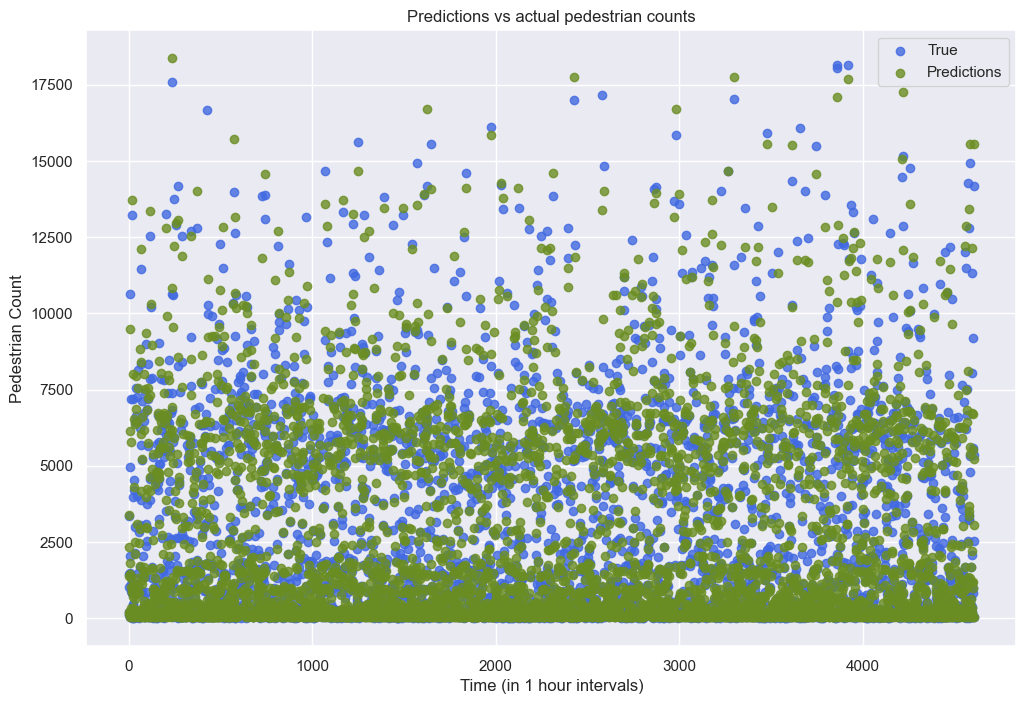

In [50]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
yhpred = h2_model.predict(Xtest) #Predict the pedestrian count with the final Hypertuned model

fig, axs = plt.subplots(figsize=(12, 8))

axs.scatter(xs, ytest, color ='royalblue', alpha=0.8, label="True")
axs.scatter(xs, yhpred, color ='olivedrab', alpha=0.8, label="Predictions")
axs.set_title('Predictions vs actual pedestrian counts')
axs.set_ylabel('Pedestrian Count')
axs.set_xlabel('Time (in 1 hour intervals)')
axs.legend(loc='upper right')

2022-12-01 19:58:38.829490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 8ms/step - loss: 314.9181 - mae: 314.9181


2022-12-01 19:58:40.378763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 5ms/step - loss: 297.1066 - mae: 297.1066


Text(109.87499999999999, 0.5, 'MAE')

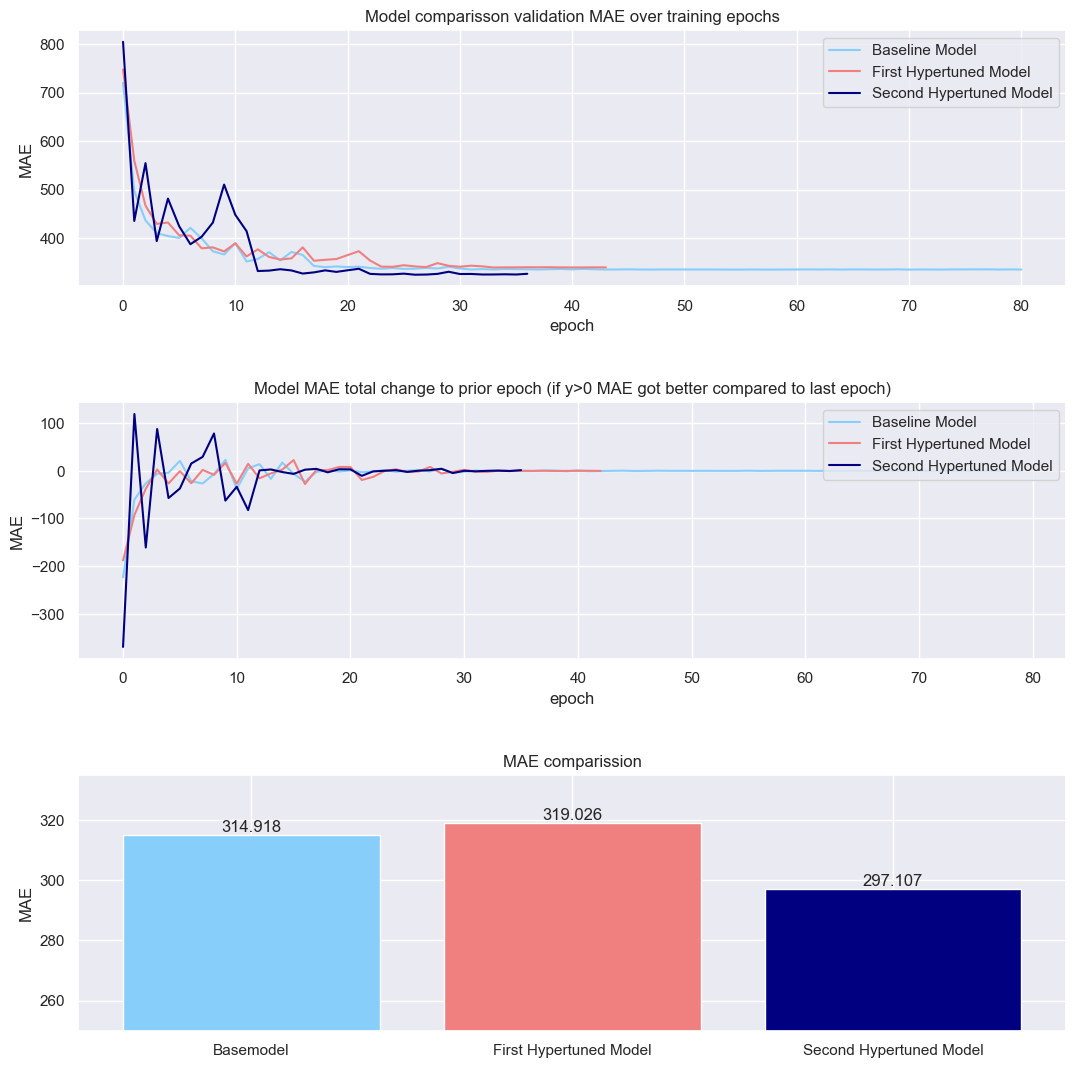

In [51]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(3, figsize=(12, 12))

fig.tight_layout(pad=5.0)

axs[0].plot(history.history['val_mae'], label="Baseline Model", color="lightskyblue")
axs[0].plot(h1_history.history['val_mae'], label="First Hypertuned Model", color="lightcoral")
axs[0].plot(h2_history.history['val_mae'], label="Second Hypertuned Model", color="Navy")
axs[0].set_title('Model comparisson validation MAE over training epochs')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='upper right')

len_epoch = len(history.history["mae"]) #How many total epochs with the Baseline Model
h1_len_epoch = len(h1_history.history["mae"]) #How many total epochs with the first Hypertuned Model
h2_len_epoch = len(h2_history.history["mae"]) #How many total epochs with the second Hypertuned Model

#Baseline Model: Compare the MAE of the Validation Data with the one in the prior epoch and take the difference to see if it got better 
dif_val = [history.history["val_mae"][1+l] - history.history["val_mae"][0+l] for l in range(len_epoch-1)] 
#First Hypertuned Model: Compare the MAE of the Validation Data with the one in the prior epoch and take the difference to see if it got better 
h1_dif_val = [h1_history.history["val_mae"][1+l] - h1_history.history["val_mae"][0+l] for l in range(h1_len_epoch-1)] 
#Second Hypertuned Model: Compare the MAE of the Validation Data with the one in the prior epoch and take the difference to see if it got better 
h2_dif_val = [h2_history.history["val_mae"][1+l] - h2_history.history["val_mae"][0+l] for l in range(h2_len_epoch-1)] 


 
axs[1].plot(dif_val, label="Baseline Model", color="lightskyblue")
axs[1].plot(h1_dif_val, label="First Hypertuned Model", color="lightcoral")
axs[1].plot(h2_dif_val, label="Second Hypertuned Model", color="navy")
axs[1].set_title('Model MAE total change to prior epoch (if y>0 MAE got better compared to last epoch)')
axs[1].set_ylabel('MAE')
axs[1].set_xlabel('epoch')
axs[1].legend(loc='upper right')
#axs[1].set_ylim([-15, 15])



base_mae = model.evaluate(Xtest, ytest)
hp1_mae = h1_model.evaluate(Xtest, ytest)
hp2_mae = h2_model.evaluate(Xtest, ytest)


axs[2].bar("Basemodel", base_mae[0], color="lightskyblue" )
axs[2].bar("First Hypertuned Model", hp1_mae[0], color="lightcoral")
axs[2].bar("Second Hypertuned Model", hp2_mae[0], color="navy")
axs[2].bar_label(axs[2].containers[0], label_type='edge')
axs[2].bar_label(axs[2].containers[1], label_type='edge')
axs[2].bar_label(axs[2].containers[2], label_type='edge')
axs[2].set_ylim([250, 335])
axs[2].set_title('MAE comparission')
axs[2].set_ylabel('MAE')

2022-12-01 19:58:42.915285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 76ms/step


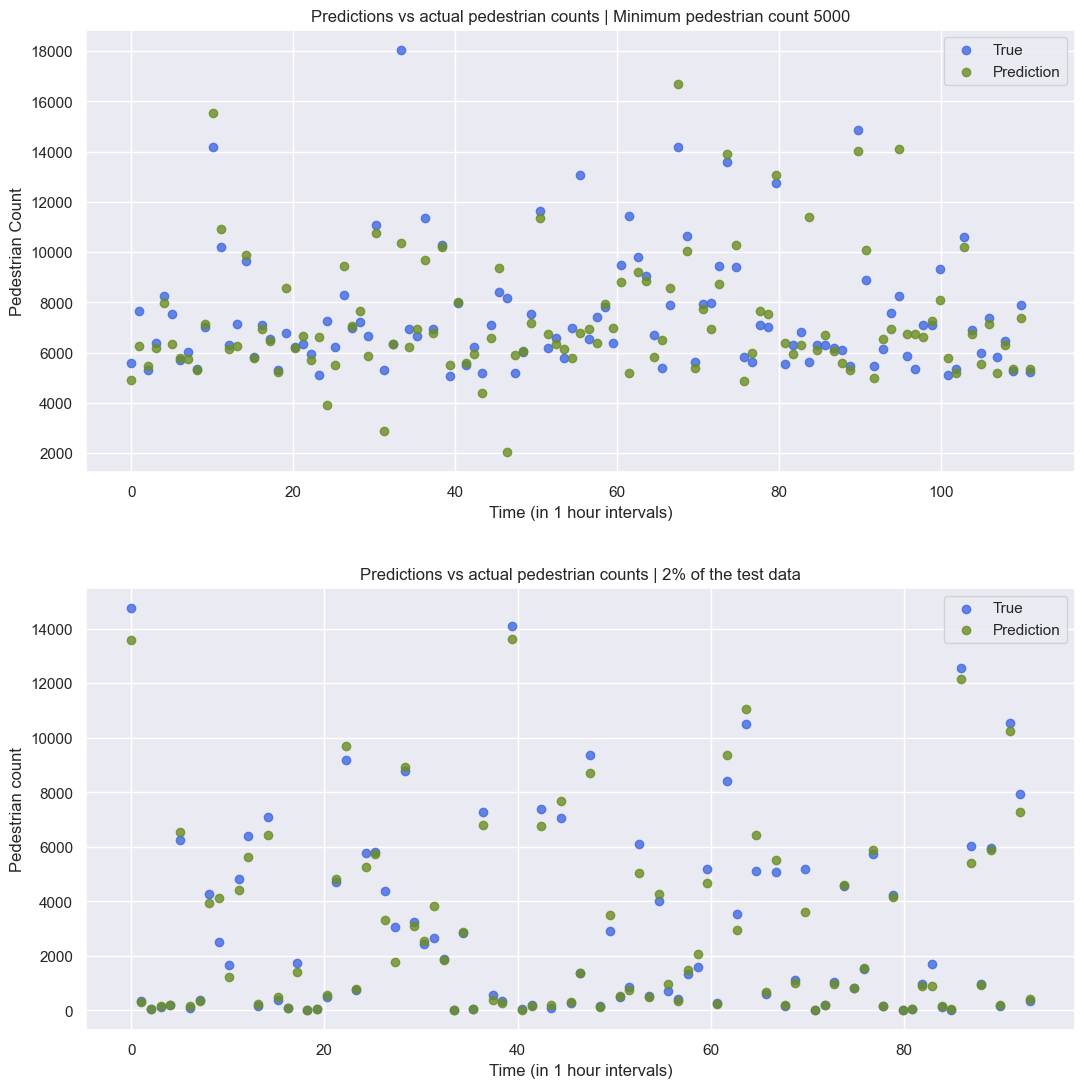

In [52]:
#Create a smaller Xtest to visualize the predictions and actual values better

Xtest_smaller1, ytest_smaller1 = Xtest_smaller(Xtest, ytest, percent=0.1, min_ped=5000)
Xtest_smaller2, ytest_smaller2 = Xtest_smaller(Xtest, ytest, percent=0.02, min_ped=0)

#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the smaller test data in order to plot
xs1 = np.linspace(0, ytest_smaller1.shape[0], num=ytest_smaller1.shape[0])
xs2 = np.linspace(0, ytest_smaller2.shape[0], num=ytest_smaller2.shape[0])

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
yhpred_smaller1 = h2_model.predict(Xtest_smaller1) #Predict the pedestrian count with the final Hypertuned model
yhpred_smaller2 = h2_model.predict(Xtest_smaller2) #Predict the pedestrian count with the final Hypertuned model

fig, axs = plt.subplots(2, figsize=(12, 12))

fig.tight_layout(pad=5.0)

axs[0].scatter(xs1, ytest_smaller1, color ='royalblue', alpha=0.8, label="True")
axs[0].scatter(xs1, yhpred_smaller1, color ='olivedrab', alpha=0.8, label="Prediction")
axs[0].set_title('Predictions vs actual pedestrian counts | Minimum pedestrian count 5000')
axs[0].set_ylabel('Pedestrian Count')
axs[0].set_xlabel('Time (in 1 hour intervals)')
axs[0].legend(loc='upper right')

axs[1].scatter(xs2, ytest_smaller2, color ='royalblue', alpha=0.8, label="True")
axs[1].scatter(xs2, yhpred_smaller2, color ='olivedrab', alpha=0.8, label="Prediction")
axs[1].set_title('Predictions vs actual pedestrian counts | 2% of the test data')
axs[1].set_ylabel('Pedestrian count')
axs[1].set_xlabel('Time (in 1 hour intervals)')
axs[1].legend(loc='upper right')


#### Visualize the predictions in comparisson with actual values 

#### This is with all data

In [53]:
split = [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
lower = 0
seperate_parts = []
for uper in split:
    part = df.loc[(df["pedestrians count"] >= lower) & (df["pedestrians count"] < uper)]
    lower = uper
    seperate_parts.append(part)

#### This is with all data

In [54]:
Xtest_new = Xtest
ytest_new = ytest
ytest_new.isna()


date
2019-03-02    False
2019-07-12    False
2019-12-25    False
2019-11-16    False
2020-01-13    False
              ...  
2019-02-12    False
2019-01-30    False
2018-11-20    False
2018-12-01    False
2019-04-18    False
Name: pedestrians count, Length: 4608, dtype: bool

In [55]:
split = [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
lower = 0
seperate_parts_y = []
seperate_parts_x = []

for uper in split:
    y_part = ytest_new[(ytest_new >= lower) & (ytest_new < uper)]
    index_for_x = y_part.index[0:len(y_part)]
    x_part = Xtest_new.loc[index_for_x,]
    lower = uper
    seperate_parts_y.append(y_part)
    seperate_parts_x.append(x_part)
seperate_parts_y

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
x_graph = np.linspace(0, len(y_graph), num=len(y_graph))
np.count_nonzero(~np.isnan(x_graph))
x_graph.max()

4608.0

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

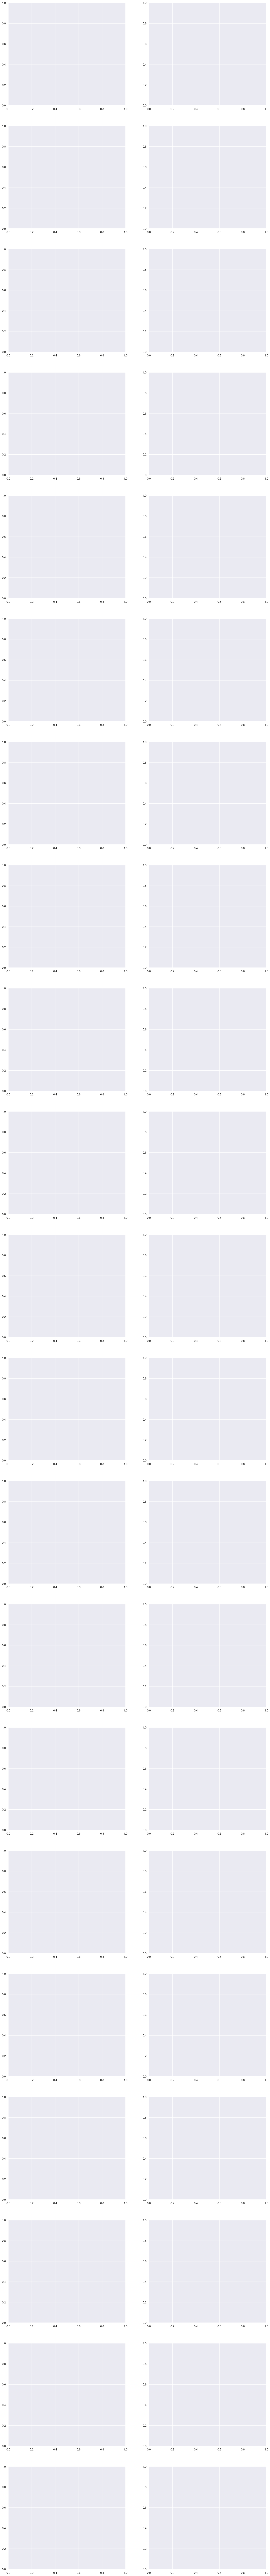

In [ ]:
from sklearn.metrics import mean_absolute_error
# Set up the canvas
fig, axs = plt.subplots(len(seperate_parts),2,figsize=(18, 180))
# Make a scatterplot with temperature on the x-axis and number of rentals on the y axis

#################################################
#THIS IS FOR TEST ONLY
#################################################
for i in range(len(seperate_parts_y)):
    X_calc = [seperate_parts_x[i].columns[55:103]] #seperate_parts_x[i]#
    # Output to predict
    y_graph = seperate_parts_y[i]#["pedestrians count"]

    x_graph = np.linspace(0, len(y_graph), num=len(y_graph))

    y_pred_graph = h2_model.predict(X_calc)

    axs[i][0].scatter(x_graph, y_graph, alpha=0.4, label="Data points")
    axs[i][0].scatter(x_graph, y_pred_graph, label="Random Forest", color="green", lw=1)
    axs[i][0].plot([], [], "" ,label=f"{mean_absolute_error(y_graph, y_pred_graph)}")


# Add the predictions of our model using a scatter plot
# Add labels on the axes, a legend, and a grid
for i in range(len(seperate_parts)):
    axs[i][0].legend()
    axs[i][0].set_xlabel("Time")
    axs[i][0].set_ylabel("People")
    axs[i][0].set_title("This are the Test Data")

#################################################
# THIS IS FOR ALL
#################################################
for i in range(len(seperate_parts)):
    X_calc = seperate_parts[i][seperate_parts[i].columns[55:103]]
    # Output to predict
    y_graph = seperate_parts[i]["pedestrians count"]

    x_graph = np.linspace(0, len(y_graph), num=len(y_graph))

    y_pred_graph = h2_model.predict(X_calc)

    axs[i][1].scatter(x_graph, y_graph, alpha=0.4, label="Data points")
    axs[i][1].scatter(x_graph, y_pred_graph, label="Neural Network", color="green", lw=1)
    axs[i][1].plot([], [], "" ,label=f"{mean_absolute_error(y_graph, y_pred_graph)}")


# Add the predictions of our model using a scatter plot
# Add labels on the axes, a legend, and a grid
for i in range(len(seperate_parts)):
    axs[i][1].legend()
    axs[i][1].set_xlabel("Time")
    axs[i][1].set_ylabel("People")
    axs[i][1].set_title("This are All Data")

#### Visualize all Models

In [ ]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 12))

fig.tight_layout(pad=5.0)

axs[0].plot(h2_history.history['mae'], label="Second Hypertuned Model", color="Navy")#Other Test MAE History - Change
axs[0].plot(h2_history.history['mae'], label="Second Hypertuned Model", color="Navy")#Other Test MAE History - Change
axs[0].plot(h2_history.history['mae'], label="Second Hypertuned Model", color="Navy")#Other Test MAE History - Change
axs[0].plot(h2_history.history['mae'], label="Second Hypertuned Model", color="Navy")#Other Test MAE History - Change
axs[0].plot(h2_history.history['mae'], label="Second Hypertuned Model", color="Navy")
axs[0].set_title('Model comparisson Test MAE over training epochs')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('epoch')
axs[0].legend(loc='upper right')


#Evalutaion on the Test Data 
hp2_mae = h2_model.evaluate(Xtest, ytest)#Other Test MAE - Change 
hp2_mae = h2_model.evaluate(Xtest, ytest)#Other Test MAE - Change
hp2_mae = h2_model.evaluate(Xtest, ytest)#Other Test MAE - Change
hp2_mae = h2_model.evaluate(Xtest, ytest)#Other Test MAE - Change
hp2_mae = h2_model.evaluate(Xtest, ytest)


axs[1].bar("Second Hypertuned Model", hp2_mae[0], color="navy")#Change
axs[1].bar("Second Hypertuned Model", hp2_mae[0], color="navy")#Change
axs[1].bar("Second Hypertuned Model", hp2_mae[0], color="navy")#Change
axs[1].bar("Second Hypertuned Model", hp2_mae[0], color="navy")#Change
axs[1].bar("Second Hypertuned Model", hp2_mae[0], color="navy")#Change

axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[1], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')

axs[1].set_ylim([250, 750])
axs[1].set_title('MAE comparission on Test data')
axs[1].set_ylabel('MAE')